In [119]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [120]:
testperson = 7

In [121]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Johan_7.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.277158,1,1,-55.256981,82.376007,696.975220,6.147055,86.758987,699.789001,0.611817,...,3.738358,3.787186,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive
1,0.288463,1,1,-55.021667,82.439049,696.922546,6.379406,86.755028,699.713013,0.611342,...,3.730591,3.775253,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive
2,0.299479,1,1,-54.779896,82.489685,696.815308,6.621910,86.740028,699.586548,0.610862,...,3.724274,3.772964,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive
3,0.310252,1,1,-54.336639,82.586670,696.726624,7.098225,86.719116,699.441711,0.609966,...,3.724487,3.774078,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive
4,0.322325,1,1,-54.123470,82.624573,696.638306,7.327115,86.694214,699.325378,0.609542,...,3.723068,3.788849,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive
5,0.333234,1,1,-53.916935,82.684441,696.688721,7.546546,86.686607,699.348572,0.609109,...,3.720840,3.796173,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive
6,0.343820,1,1,-53.484089,82.780075,696.634399,7.974635,86.656334,699.245667,0.608228,...,3.722809,3.790283,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive
7,0.355535,1,1,-53.264893,82.844398,696.765686,8.216300,86.653885,699.347290,0.607757,...,3.728897,3.788696,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive
8,0.366606,1,1,-53.031487,82.895409,696.827881,8.488420,86.636688,699.382019,0.607268,...,3.742142,3.784546,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive
9,0.377673,1,1,-52.576862,82.997002,696.930054,8.993587,86.595665,699.432068,0.606318,...,3.739609,3.785400,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive


In [122]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(186270, 39)

In [123]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P06_text.txt', 'AI_HC_P06_MCQ.txt', 'AI_HC_P06_FIBQ.txt',
       'OR_HC_P06_text.txt', 'OR_HC_P06_MCQ.txt', 'OR_HC_P06_FIBQ.txt',
       'AI_SK_P06_text.txt', 'AI_SK_P06_MCQ.txt', 'AI_SK_P06_FIBQ.txt',
       'OR_SK_P06_text.txt', 'OR_SK_P06_MCQ.txt', 'OR_SK_P06_FIBQ.txt',
       'AI_KB_P06_text.txt', 'AI_KB_P06_MCQ.txt', 'AI_KB_P06_FIBQ.txt',
       'OR_KB_P06_text.txt', 'OR_KB_P06_MCQ.txt', 'OR_KB_P06_FIBQ.txt'],
      dtype=object)

In [124]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-88.892334,100.771088,600.654907,-27.370115,99.499840,606.430359,0.709386,...,2.854462,2.853592,True,OR_SK_P06_text.txt,6.0,16.0,Arial,SK,False,Immersive
1,0.012076,1,1,-88.912354,100.763206,600.633972,-27.383730,99.499680,606.414307,0.709441,...,2.845917,2.852875,True,OR_SK_P06_text.txt,6.0,16.0,Arial,SK,False,Immersive
2,0.021872,1,1,-88.958534,100.740669,600.605469,-27.415546,99.488182,606.399353,0.709562,...,2.844345,2.850845,True,OR_SK_P06_text.txt,6.0,16.0,Arial,SK,False,Immersive
3,0.033099,1,1,-88.958534,100.740669,600.605469,-27.422394,99.489815,606.412720,0.709562,...,2.844345,2.847183,True,OR_SK_P06_text.txt,6.0,16.0,Arial,SK,False,Immersive
4,0.045273,1,1,-88.963654,100.738609,600.589111,-27.435387,99.480621,606.401489,0.709579,...,2.843262,2.848053,True,OR_SK_P06_text.txt,6.0,16.0,Arial,SK,False,Immersive


In [125]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1109.229202,1071.070251,375.687661,385.114231
1,0.012076,1108.182907,1070.314941,376.155481,384.963684
2,0.021872,1109.893951,1076.750336,373.317790,388.698392
3,0.033099,1106.767426,1076.750336,373.927746,388.698392
4,0.045273,1108.950729,1075.157013,379.764619,390.438738
...,...,...,...,...,...
12090,139.786790,1401.671143,1365.960083,664.484324,621.090517
12091,139.798072,1402.171783,1358.134766,665.176978,628.461099
12092,139.808708,1399.221191,1351.087799,666.814799,627.955341
12093,139.820047,1397.398682,1355.008392,670.827169,634.578681


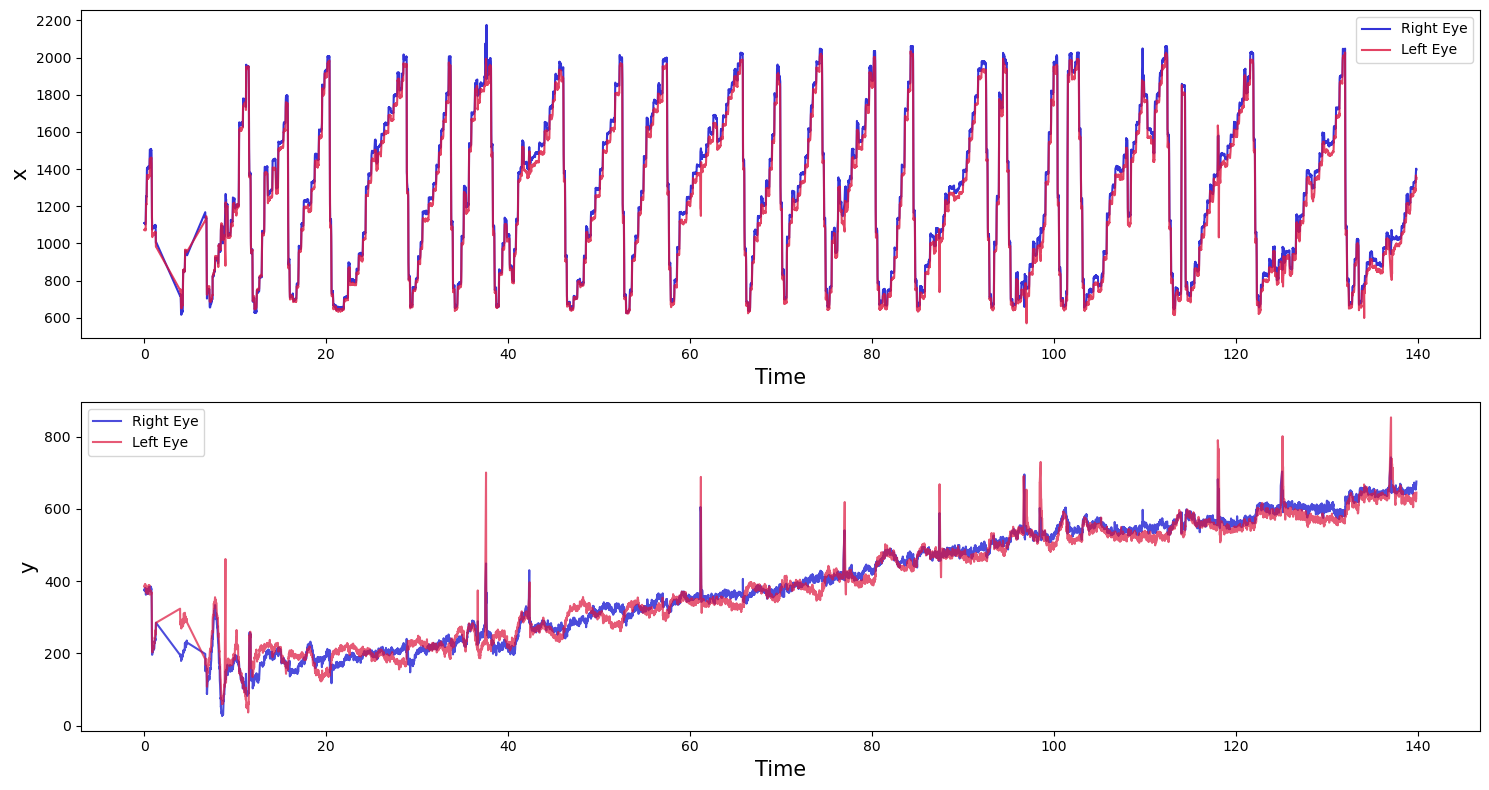

In [126]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [127]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [128]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [129]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [130]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,902.322998,896.800919,208.129056,283.291848
1,0.010288,898.066330,893.549423,208.054276,289.501977
2,0.020823,897.899475,893.549423,212.717500,289.501977
3,0.033185,895.589752,888.094025,210.952585,284.900358
4,0.043070,901.721573,883.634720,213.311834,287.741504
...,...,...,...,...,...
555,6.262007,1325.644684,1264.527893,224.053974,238.929827
556,6.272876,1322.446747,1271.035614,222.521725,238.857923
557,6.284353,1321.256714,1273.538895,229.460471,238.513248
558,6.295209,1316.875916,1266.237030,231.269052,240.872262


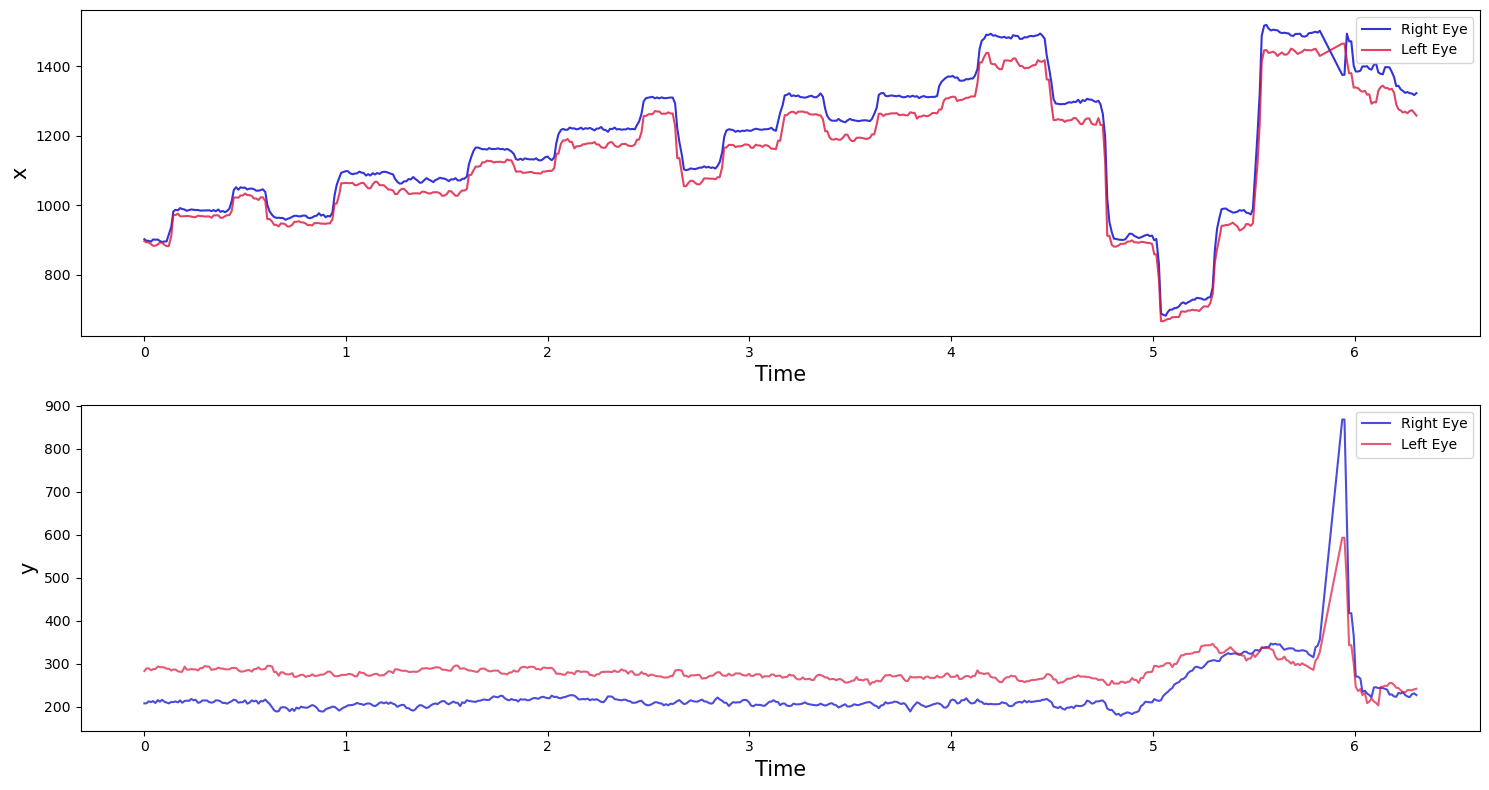

In [131]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


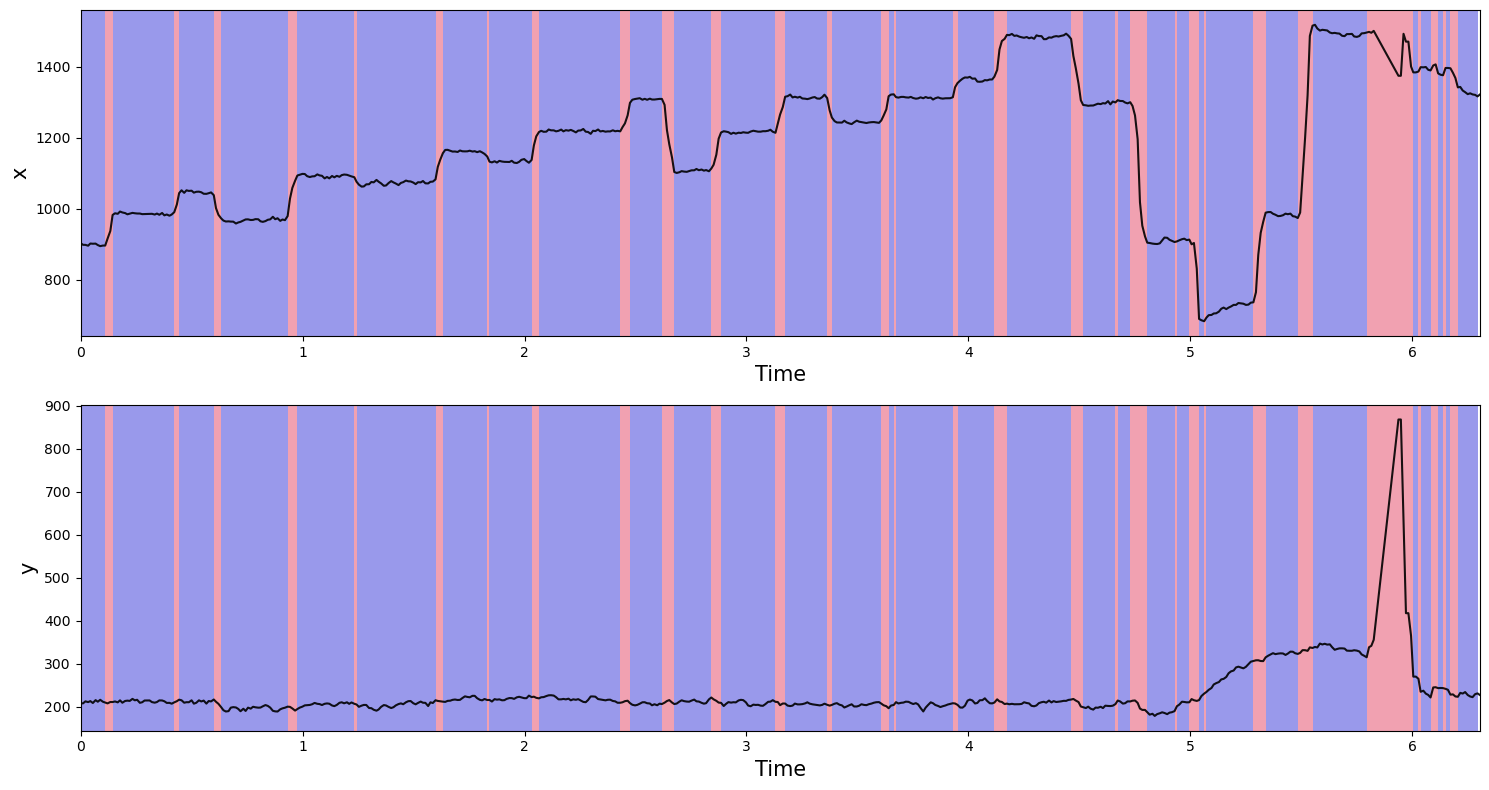

In [132]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [133]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [134]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-101.195251,94.365021,625.917603,-44.403812,109.960648,633.067993,0.729163,...,3.440765,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Skimming,0
1,0.010640,1,1,-101.195251,94.365021,625.917603,-44.146545,110.026031,633.102905,0.729163,...,3.444977,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Skimming,0
2,0.023244,1,1,-101.195251,94.365021,625.917603,-43.681992,110.141907,633.157104,0.729163,...,3.444427,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Skimming,0
3,0.034158,1,1,-98.628075,95.506607,622.817139,-42.173088,110.264778,631.986511,0.724388,...,3.425751,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Skimming,0
4,0.044425,1,1,-98.628075,95.506607,622.817139,-41.759586,110.456055,632.418945,0.724388,...,3.423386,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Skimming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.043794,1,1,-98.983162,95.292610,629.099731,-41.695599,108.631332,637.659607,0.722958,...,3.357178,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Skimming,1
95,1.056177,1,1,-99.070343,95.295441,629.071838,-41.754353,108.651611,637.645813,0.723166,...,3.344742,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Skimming,1
96,1.066607,1,1,-99.253242,95.321663,629.038086,-41.890190,108.686096,637.642395,0.723593,...,3.347321,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Skimming,1
97,1.077288,1,1,-99.253242,95.321663,629.038086,-41.933762,108.710457,637.646484,0.723593,...,3.355789,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Skimming,0


In [135]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [136]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-55.256981,82.376007,696.975220,6.147055,86.758987,699.789001,0.611817,...,3.787186,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive,1
1,0.011305,1,1,-55.021667,82.439049,696.922546,6.379406,86.755028,699.713013,0.611342,...,3.775253,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive,1
2,0.022320,1,1,-54.779896,82.489685,696.815308,6.621910,86.740028,699.586548,0.610862,...,3.772964,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive,1
3,0.033094,1,1,-54.336639,82.586670,696.726624,7.098225,86.719116,699.441711,0.609966,...,3.774078,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive,1
4,0.045166,1,1,-54.123470,82.624573,696.638306,7.327115,86.694214,699.325378,0.609542,...,3.788849,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7913,89.870471,1,1,-51.747398,78.365997,674.917053,10.092768,82.713264,677.393799,0.608114,...,2.787369,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive,1
7914,89.882221,1,1,-51.736755,78.349525,674.725952,10.089060,82.686180,677.151550,0.608122,...,2.786301,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive,1
7915,89.893405,1,1,-51.720718,78.337669,674.533936,10.102037,82.677742,676.930054,0.608119,...,2.780319,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive,1
7916,89.903839,1,1,-51.690350,78.314957,674.148560,10.110658,82.654312,676.625061,0.608117,...,2.779984,True,AI_HC_P06_text.txt,6.0,16.0,Arial,HC,False,Immersive,1


In [137]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [138]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [139]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")